In [75]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
#training using 11 classes, the last one is random

mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

  # Create the model
x = tf.placeholder(tf.float32, [None, 784])
#W = tf.Variable(tf.random_normal([784, 10], stddev=0.2))
W = tf.Variable(tf.zeros([784, 11]))
b = tf.Variable(tf.zeros([11]))
y = tf.matmul(x, W) + b
#y = tf.nn.softmax(y) no activation function

rand = abs(np.random.normal(0,0.5,(2000,784)))
#mnist_train = np.array(mnist.train.images[0:20000])
mnist_train = np.array(mnist.train.images) #55000 entries
input_x = np.concatenate((mnist_train, rand), axis=0) #57000 entries

  # Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 11])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

label_mnist_last = np.zeros([55000,1])
labels_mnist = np.concatenate((mnist.train.labels, label_mnist_last), axis=1)
labels_rnd = np.concatenate((np.zeros([2000,10]), np.ones([2000,1])), axis=1)
labels = np.concatenate((labels_mnist, labels_rnd), axis=0)

sess = tf.InteractiveSession()

tf.initialize_all_variables().run()
for _ in range(1000):
    batch_xs = input_x
    batch_ys = labels
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x1103cbf10>> ignored


In [76]:
#calculating accuracy for test
rand_in_tst = abs(np.random.normal(0,0.5,(1000,784)))
mnist_test = np.array(mnist.test.images)
input_tst = np.concatenate((mnist_test, rand_in_tst), axis=0)

label_mnist_last_tst = np.zeros([10000,1])
labels_mnist_tst = np.concatenate((mnist.test.labels, label_mnist_last_tst), axis=1)
labels_rnd_tst = np.concatenate((np.zeros([1000,10]), np.ones([1000,1])), axis=1)
labels_tst = np.concatenate((labels_mnist_tst, labels_rnd_tst), axis=0)

weights = np.array(sess.run(W))
biases = np.array(sess.run(b))

outputs_test = np.dot(input_tst,weights)+biases

correct_prediction = tf.equal(tf.argmax(outputs_test, 1), tf.argmax(labels_tst, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: %f" % sess.run(accuracy, feed_dict={x:input_tst,
                                      y_: labels_tst}))

Test accuracy: 0.928545


[ 7  2  1 ..., 10 10 10]


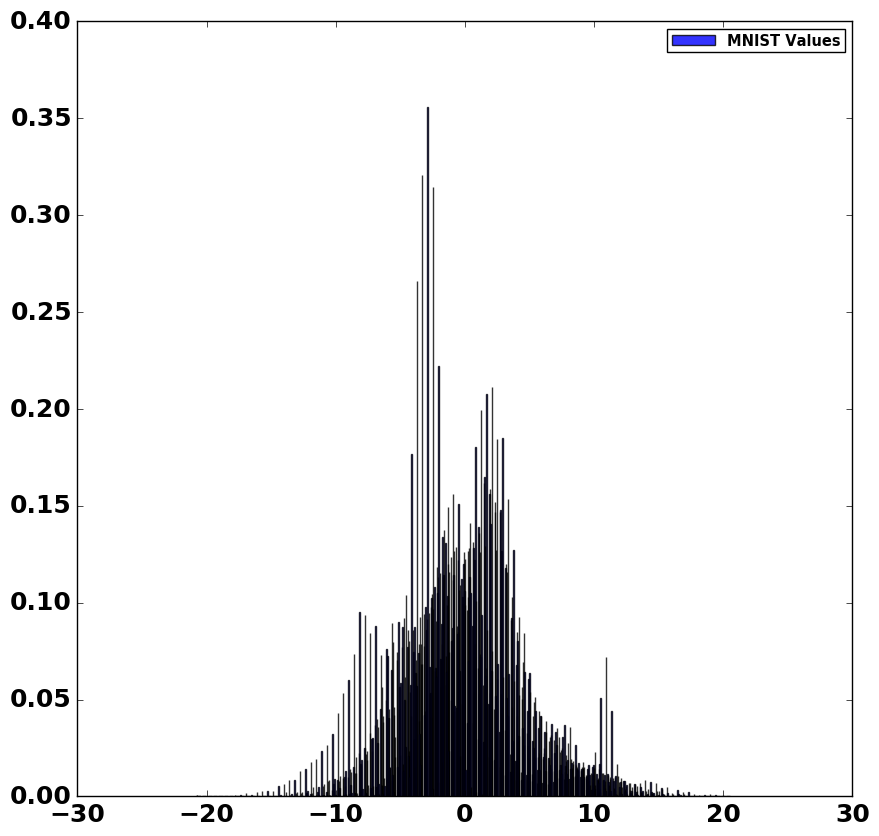

In [77]:
#testing model with 11 classes
import numpy as np

weights = np.array(sess.run(W))
biases = np.array(sess.run(b))


rand_in = abs(np.random.normal(0,0.5,(1000,784)))
mnist_test = np.array(mnist.test.images)
input_x = np.concatenate((mnist_test, rand_in), axis=0)


outputs = np.dot(input_x,weights)+biases

print (outputs.argmax(1))

#input_test = np.random.random([10000,784])
#outputs_test = np.dot(input_test,weights)+biases

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline

#print (outputs_test.max(1))
n_bins = np.linspace(min([outputs.max(1).min(), outputs.min()]),
                     max([outputs.max(1).max(), outputs.max()]),
                     100)


fig, ax = plt.subplots(figsize=(10,10),nrows=1, ncols=1)
#n, bins, patches = ax.hist(outputs_test.max(1),bins=n_bins,fc='r',alpha=0.8, normed=1,label='Random Values')

n, bins, patches = ax.hist(outputs,bins=n_bins,fc='b',alpha=0.8, normed=1,label='MNIST Values')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels,loc='upper right', fontsize=10.5)



In [239]:
#checking shapes...
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

rand = abs(np.random.normal(0,0.5,(2000,784)))
mnist_train = np.array(mnist.train.images[0:20000])
print ("mnist test shape", mnist_test.shape)
input_x = np.concatenate((mnist_train, rand), axis=0)
print ("input concatenado", input_x.shape)

label_mnist_last = np.zeros([20000,1])
labels_mnist = np.concatenate((mnist.train.labels[0:20000], label_mnist_last), axis=1)
print("labels_mnist: ", labels_mnist.shape)
labels_rnd = np.concatenate((np.zeros([2000,10]), np.ones([2000,1])), axis=1)
print ("labels_rnd: ", labels_rnd.shape)
labels = np.concatenate((labels_mnist, labels_rnd), axis=0)
print ("labels final", labels.shape)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
('mnist test shape', (10000, 784))
('input concatenado', (22000, 784))
('labels_mnist: ', (20000, 11))
('labels_rnd: ', (2000, 11))
('labels final', (22000, 11))


In [62]:
print (mnist.train.images.shape)
#outputs_bla = np.dot(rand_in_tst,weights)+biases

#print(labels_rnd_tst.argmax(1))
#print(outputs_bla.argmax(1))

(55000, 784)


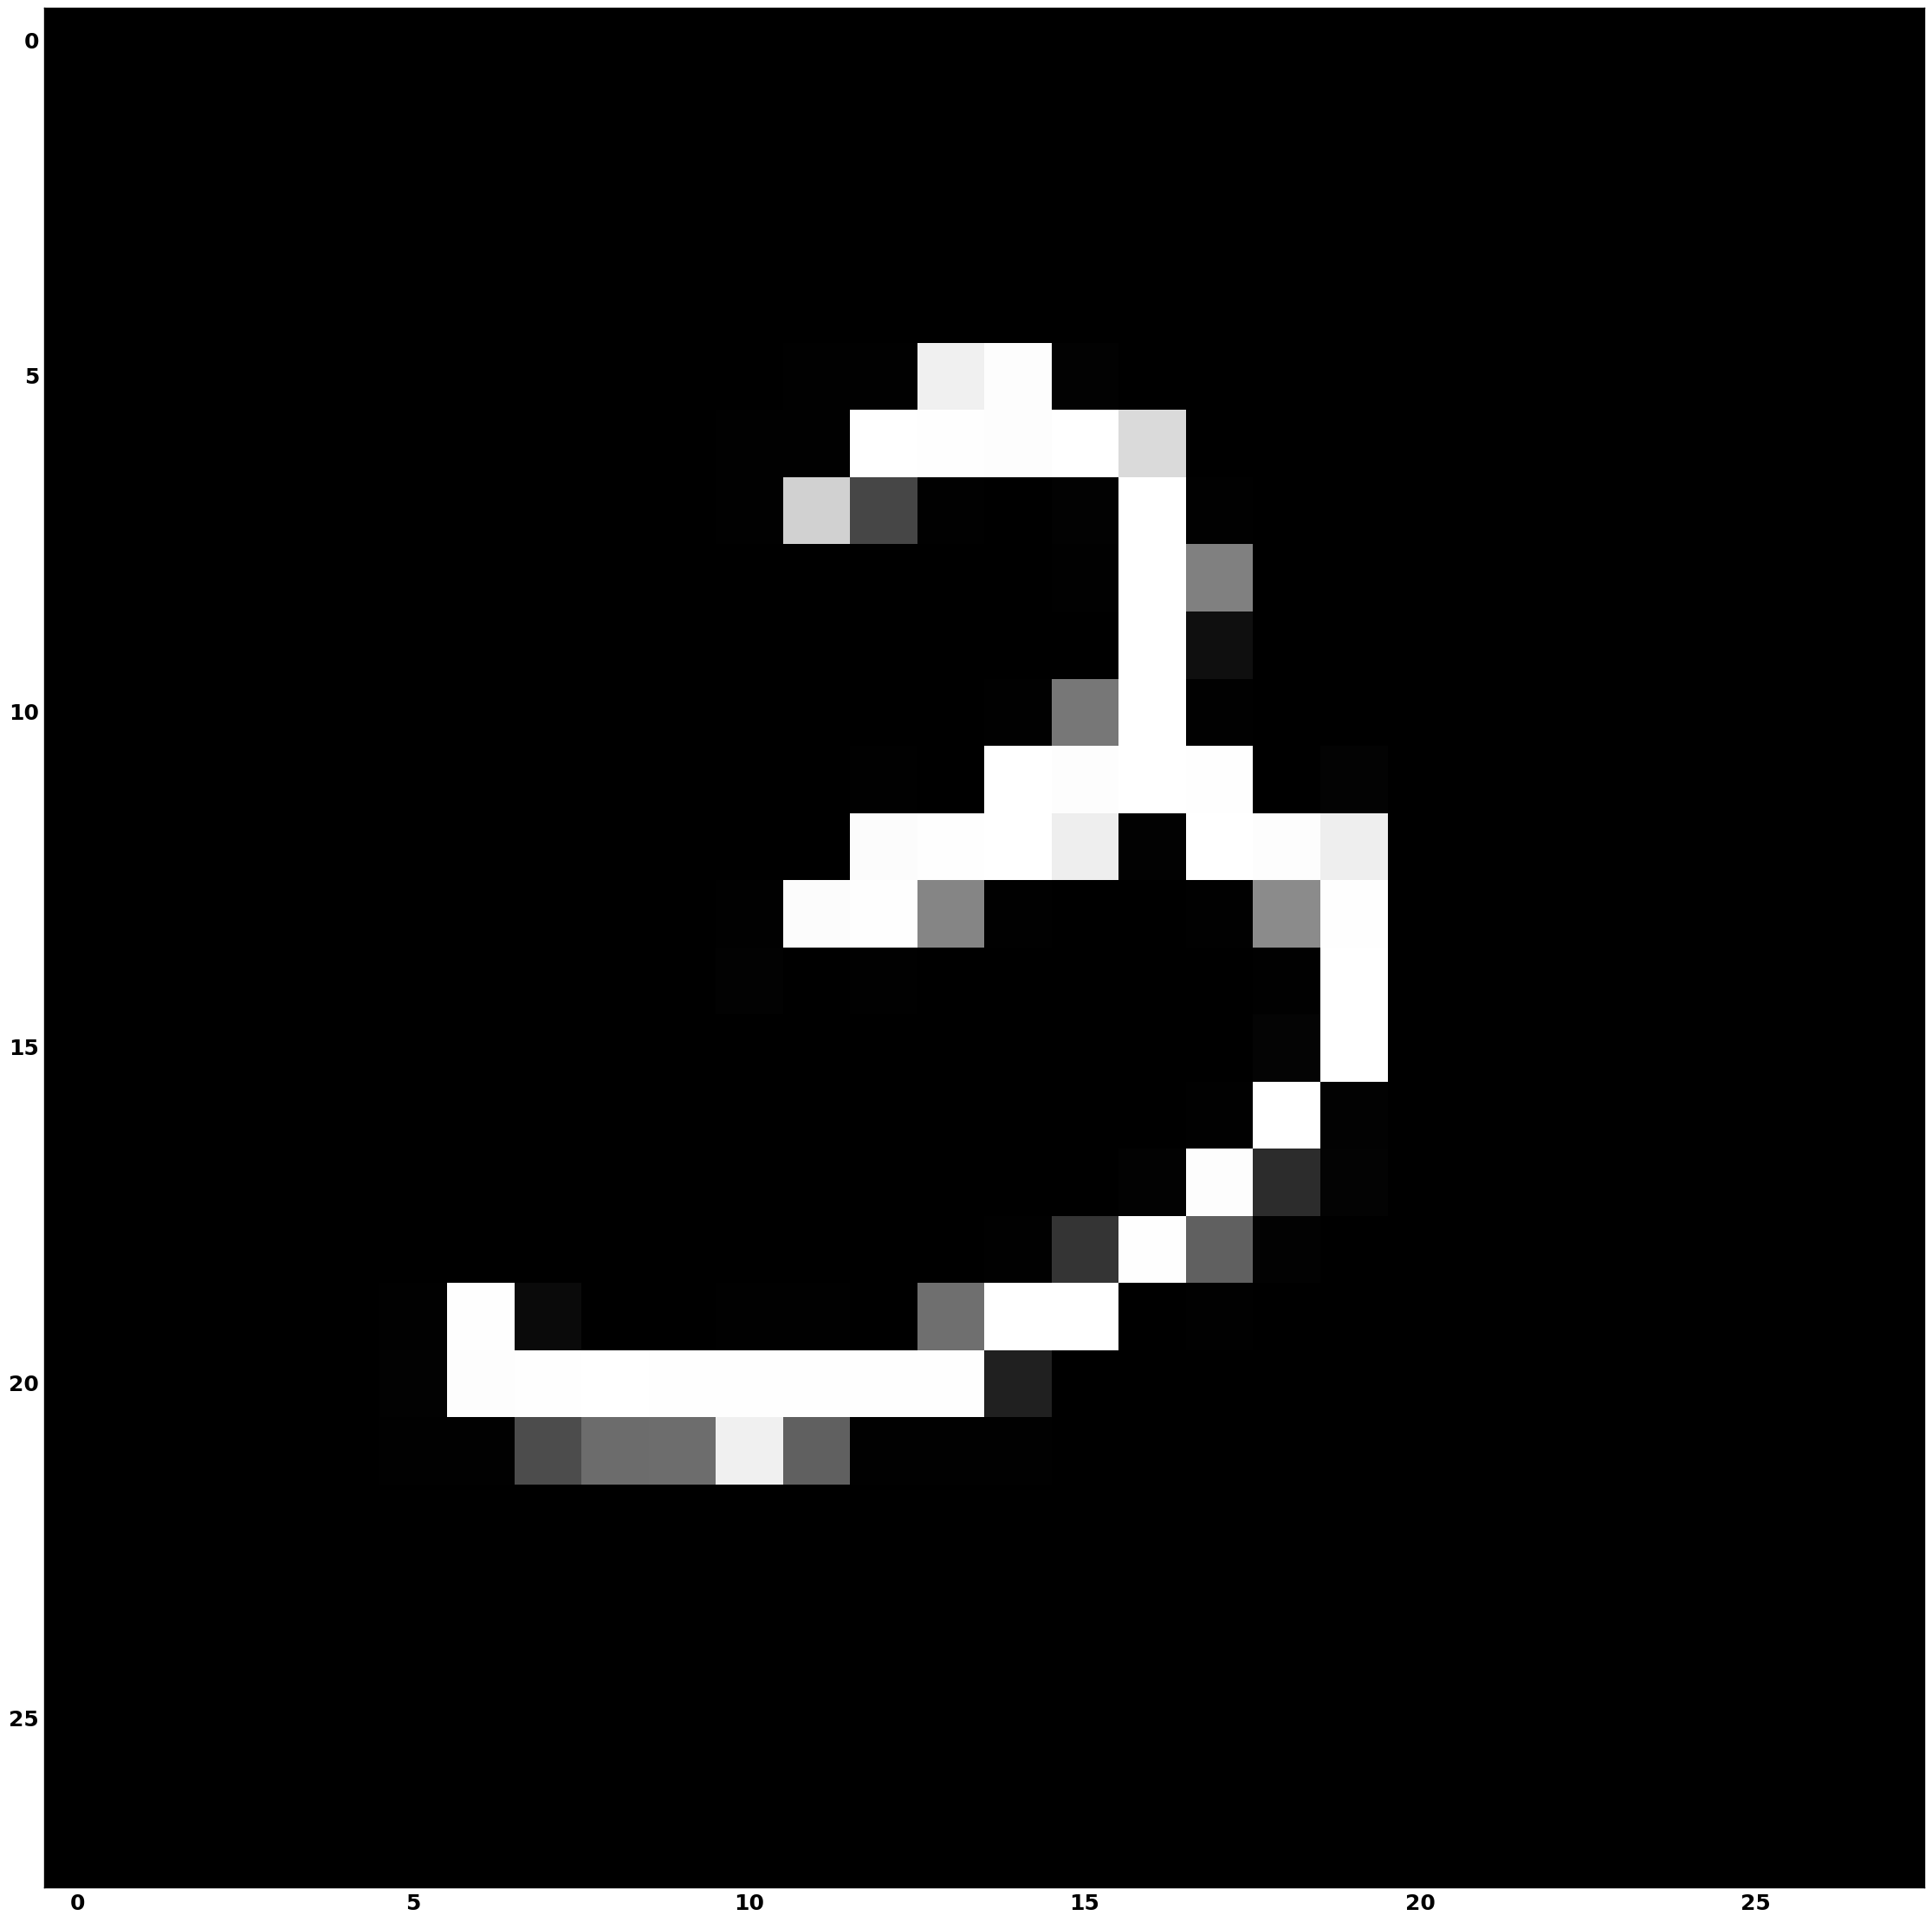

In [227]:
#showing character
import cv2
import numpy as np
img_raw = cv2.imread('tresteste.jpg',cv2.CV_LOAD_IMAGE_GRAYSCALE)
img_raw = cv2.resize(img_raw, (28, 28)) 

inv_mat = np.ones([28,28])*255
img_inv = abs(np.subtract(img_raw, inv_mat))
#img[img>200] = 255
#img[img<200] = 0
img_norm = img_inv/255

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline

fig, ax = plt.subplots(figsize=(28,28),nrows=1, ncols=1)
mnist_test = np.reshape(mnist.test.images[10,:],[28,28])
ax.imshow(img_norm,cmap='gray',interpolation="nearest")

#print(img_inv.shape)
#print(mnist_test.shape)

In [228]:
#testing new character
mais_input = np.reshape(img_norm,[784,])
#print (mais_input)
#print(mnist_test)

out_mais = np.dot(mais_input,weights)+biases

rand_inp = np.random.random([1,784])
out_rand = np.dot(rand_inp,weights)+biases

#print (sess.run(out_rand_act))
print(out_mais)
print ("Resposta:", out_mais.argmax())
#print ("saida para o mais:", out_rand.argmax(1))
#print ("saida para o aleatorio:", sess.run(out_rand_act).argmax(1))

[ 0.20628562  0.41023942  0.49904764  3.88717669 -3.32506913  2.32170115
 -2.01029126  0.09048887 -0.25176636  0.14176035 -1.96952917]
('Resposta:', 3)
